### **Importações**

In [1]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [30]:
#Importação do dataset de treino
file_path = r'Treino.csv'
df_treino = pd.read_csv(file_path)
display(df_treino.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,0,1,1,-1,1,-1,-1,1,0,1
1,1,-1,0,0,1,1,-1,-1,1,1
2,1,-1,0,-1,1,0,0,0,1,1
3,-1,0,0,-1,0,0,1,1,1,1
4,1,-1,-1,1,0,1,1,0,-1,1


In [31]:
# Importação dos dataset de validacao e teste
file_path = r'Validacao.csv'
df_validacao = pd.read_csv(file_path)
df_validacao = df_validacao.astype(int)
display(df_validacao.head())

file_path = r'Teste.csv'
df_teste = pd.read_csv(file_path)
df_teste = df_teste.astype(int)
display(df_teste.head())

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,0,0,1,-1,0,1,-1,0,1
1,0,-1,1,0,1,0,1,-1,0,1
2,-1,1,-1,0,1,0,0,1,0,1
3,0,-1,1,1,-1,1,-1,0,1,1
4,-1,-1,0,1,1,1,-1,1,0,1


,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
0,1,0,-1,1,1,1,-1,0,-1,1
1,1,1,1,-1,1,0,-1,0,-1,1
2,1,-1,1,-1,1,-1,1,-1,1,1
3,-1,0,1,-1,0,1,1,-1,1,1
4,0,0,0,0,-1,-1,1,1,1,1


In [32]:
df_treino.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,0.022750,0.024728,0.032641,0.049456,0.008902,0.041543,0.037587,0.047478,0.045500,0.100890
std,0.831602,0.827965,0.844272,0.819035,0.848365,0.813412,0.829274,0.831152,0.834828,0.908545
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [33]:
df_treino['Resultado'].value_counts()

Resultado
 1    320
-1    320
 0    320
 2     51
Name: count, dtype: int64

In [34]:
df_validacao.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.000000,0.055118,0.055118,-0.015748,0.070866,0.094488,0.031496,0.094488,-0.031496,0.110236
std,0.872872,0.829104,0.848033,0.776482,0.874517,0.781056,0.853908,0.885806,0.853908,0.919181
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [35]:
df_validacao['Resultado'].value_counts()

Resultado
 1    40
-1    40
 0    40
 2     7
Name: count, dtype: int64

In [36]:
df_teste.describe()

,J1,J2,J3,J4,J5,J6,J7,J8,J9,Resultado
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.039683,0.039683,-0.039683,0.031746,0.071429,0.087302,0.095238,-0.039683,0.031746,0.095238
std,0.833314,0.773571,0.813887,0.828845,0.896023,0.829649,0.861892,0.783845,0.911583,0.907115
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [37]:
df_teste['Resultado'].value_counts()

Resultado
 1    40
-1    40
 0    40
 2     6
Name: count, dtype: int64

#### **Treino**

In [38]:
# Filtrando as features que serão passadas para predição
X = df_treino.drop(columns=['Resultado'])
X

,J1,J2,J3,J4,J5,J6,J7,J8,J9
0,0,1,1,-1,1,-1,-1,1,0
1,1,-1,0,0,1,1,-1,-1,1
2,1,-1,0,-1,1,0,0,0,1
3,-1,0,0,-1,0,0,1,1,1
4,1,-1,-1,1,0,1,1,0,-1
...,...,...,...,...,...,...,...,...,...
1006,-1,0,1,1,1,-1,-1,0,1
1007,0,0,1,0,0,0,0,-1,1
1008,1,1,0,0,0,1,-1,-1,0
1009,-1,0,1,1,0,-1,-1,1,1


In [39]:
# Obtendo as labels do dataset de treino
Y = df_treino['Resultado'].values
Y

array([1, 1, 1, ..., 0, 0, 0])

##### **Uso de heurística para determinar o K**

**Regra da Raiz Quadrada**

In [40]:
from math import sqrt,ceil

# Arrendondando a raiz quadrada do total de entradas do dataset de treino

k = ceil(sqrt(df_treino['J1'].count())) 
print("Quantidade vizinhos: {}".format(k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Quantidade vizinhos: 32
K=32, Acurácia média: 0.7061942154806614


**Definição a partir do tamanho do dataset**

In [41]:
qtd_amostras = df_treino['J1'].count()
k = ceil(0.02 * qtd_amostras)  # 2% do número total de amostras
print("Tamanho do dataset: {}\nValor K: {}".format(qtd_amostras,k))

# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
print("K={}, Acurácia média: {}".format(k,score.mean()))

Tamanho do dataset: 1011
Valor K: 21


K=21, Acurácia média: 0.7526800955957664


**Cross-Validation**

In [42]:
# Lista para guardar os resultados dos testes para k
lista_k_accuracy = []

# Criação do classificador
for k in range(1,21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    # Treino do modelo
    clf.fit(X.values, Y)

    score = cross_val_score(clf, X.values, Y, cv=5, scoring=None)
    lista_k_accuracy.append([k,score.mean()])

In [43]:
# Tranformando a lista de acurácias em um array 20x2
array_acuracia = np.array(lista_k_accuracy)

# Obtendo o k a partir da maior acurácia continda na segunda coluna da matriz
k = np.argmax(array_acuracia[:, 1])

# Obtendo o valor da acurácia na posição do k
accuracia = array_acuracia[k][1]

print("K={}, Acurácia média: {}".format(k,accuracia))

K=9, Acurácia média: 0.8239330829634689


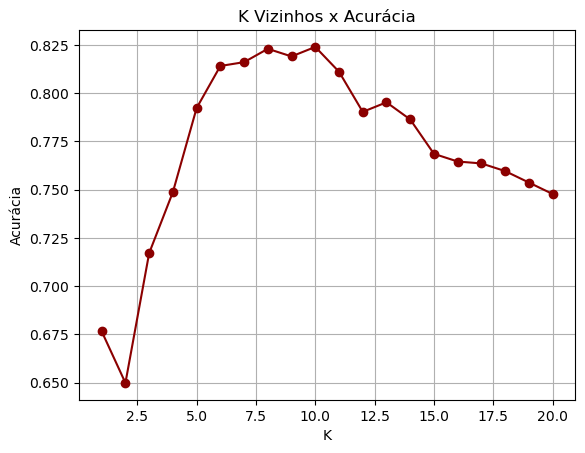

In [44]:
# Separando em listas separadas para o eixo x e y
x = [par[0] for par in lista_k_accuracy]
y = [par[1] for par in lista_k_accuracy]

# Plotar o gráfico de linha
plt.plot(x, y, marker='o',color='darkred') 

# Adicionar título e rótulos
plt.title('K Vizinhos x Acurácia')
plt.xlabel('K')
plt.ylabel('Acurácia')

# Mostrar o gráfico
plt.grid(True)
plt.show()


In [45]:
# Criação do classificador
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

# Treino do modelo
clf.fit(X.values, Y)

KNeighborsClassifier(n_neighbors=9)

#### **Validação**

In [46]:
# Filtrando as features que serão passadas para predição
X_valid = df_validacao.drop(columns=['Resultado'])
X_valid = X_valid.values
X_valid

array([[ 1,  0,  0, ...,  1, -1,  0],
       [ 0, -1,  1, ...,  1, -1,  0],
       [-1,  1, -1, ...,  0,  1,  0],
       ...,
       [-1,  1,  1, ...,  0,  1,  0],
       [-1,  0,  0, ...,  1,  1,  0],
       [ 1,  1,  0, ...,  0,  0,  0]])

In [47]:
# Obtendo as labels do dataset de validação
Y_valid = df_validacao.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_valid

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [48]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_valid)

# Calculando a acurácia
acuracia = accuracy_score(Y_valid, predicao)
print("Acurácia: {:.2f}".format(acuracia))


Acurácia: 0.83


#### **Teste**

In [49]:
# Filtrando as features que serão passadas para predição
X_test = df_teste.drop(columns=['Resultado'])
X_test = X_test.values
X_test

array([[ 1,  0, -1, ..., -1,  0, -1],
       [ 1,  1,  1, ..., -1,  0, -1],
       [ 1, -1,  1, ...,  1, -1,  1],
       ...,
       [ 0,  1, -1, ...,  1,  0,  0],
       [ 1,  1,  0, ..., -1,  0, -1],
       [ 1,  0,  1, ...,  0, -1,  0]])

In [50]:
# Obtendo as labels do dataset de teste
Y_test = df_teste.drop(columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9'])['Resultado'].values
Y_test

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

In [51]:
# Criação das predições a partir da base de validação
predicao = clf.predict(X_test)

print(predicao)

# Calculando a acurácia
acuracia = accuracy_score(Y_test, predicao)
print("Acurácia: {:.2f}".format(acuracia))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  2  2  0  0  0 -1  0  0 -1 -1  0  0  0  0  0
  0  0  0  0  0  1  2  0  0  0  0  0  0 -1  2  1 -1 -1  0  0  0 -1  0 -1
  0 -1  0  0 -1  0]
Acurácia: 0.86


In [52]:
# Nomes das classes
nomes_classes = ["O ganhou","Ainda tem jogo","X ganhou","Empate"]

# Calcular e imprimir o relatório de classificação
relatorio_classificacao = classification_report(Y_test, predicao, target_names=nomes_classes)
print("Relatório de Classificação:\n", relatorio_classificacao)

Relatório de Classificação:
                 precision    recall  f1-score   support

      O ganhou       0.80      1.00      0.89        40
        Empate       0.87      0.65      0.74        40
      X ganhou       0.95      1.00      0.98        40
Ainda tem jogo       0.50      0.33      0.40         6

      accuracy                           0.86       126
     macro avg       0.78      0.75      0.75       126
  weighted avg       0.86      0.86      0.85       126



### **Partida**

In [53]:
import numpy as np
import random

### **Função para plotagem do tabuleiro**

In [54]:
import matplotlib.pyplot as plt

def plot_board(board,predicao=None):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    if predicao is not None:
        plt.text(1.5, -0.5, 'Status: ' + predicao, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


##### **Funções para realização de jogadas**

In [55]:
# Função para coleta da jogada
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)

# Função para validação da posição informada para realização da jogada
def valida_jogada(jogada,linha,coluna):
    
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    print("Linha:",linha)
    print("Linha:",coluna)
        
    # Verificar se o valor na posição especificada é igual a zero
    if jogada[linha-1][coluna-1] == 0:
        return True
    
    return False
    

# Função para realização da jogada do computador a partir de uma função aleatória
def jogada_COM(jogada):
    jogada_feita = False
    
    while not jogada_feita: 
        # Escolha de um índices de linha e coluna na lista
        linha = random.randint(0,2)
        coluna = random.randint(0,2)

        # Caso a posição escolhida esteja livre realiza a modificação
        if jogada[linha][coluna] not in [1,-1]:
            # Atrubuição realizada na posição aleatória escolhida
            jogada[linha,coluna] = -1
            jogada_feita = True
        
    return jogada


def ajuste_jogada(jogada,linha,coluna):
    # Conversão da jogada em um array 3x3
    jogada = np.array(jogada).reshape(3,3)

    # Substituindo o valor da posição informada em 1
    jogada[linha-1,coluna-1] = 1

    return jogada

In [56]:
# Para cada linha no dataset de teste, executar clf.predict e imprimir o resultado
for index, row in df_teste.iterrows():
    features = row.drop('Resultado').values.reshape(1, -1)
    prediction = clf.predict(features)
    actual_result = row['Resultado']
    if prediction != actual_result:
        print(f"Index: {index}, Prediction: {prediction[0]}, Actual Result: {actual_result}")

Index: 80, Prediction: 0, Actual Result: 2
Index: 83, Prediction: 0, Actual Result: 2
Index: 84, Prediction: 0, Actual Result: 2
Index: 85, Prediction: 0, Actual Result: 2
Index: 86, Prediction: -1, Actual Result: 0
Index: 89, Prediction: -1, Actual Result: 0
Index: 90, Prediction: -1, Actual Result: 0
Index: 101, Prediction: 1, Actual Result: 0
Index: 102, Prediction: 2, Actual Result: 0
Index: 109, Prediction: -1, Actual Result: 0
Index: 110, Prediction: 2, Actual Result: 0
Index: 111, Prediction: 1, Actual Result: 0
Index: 112, Prediction: -1, Actual Result: 0
Index: 113, Prediction: -1, Actual Result: 0
Index: 117, Prediction: -1, Actual Result: 0
Index: 119, Prediction: -1, Actual Result: 0
Index: 121, Prediction: -1, Actual Result: 0
Index: 124, Prediction: -1, Actual Result: 0


#### **Realização da partida**

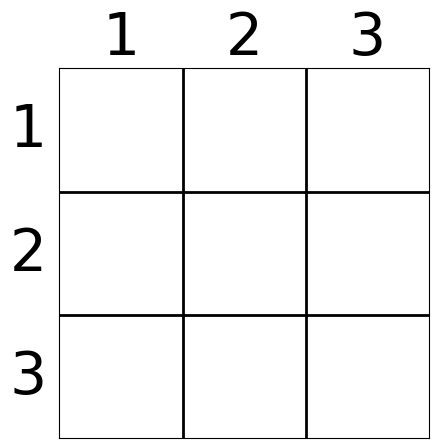


[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [57]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)
plot_board(jogada)

finalizar_jogo = False

print("=====================================\n")

while not finalizar_jogo:
    # Plotando o tabuleiro 
    # plot_board(jogada)
    print(np.array(jogada).reshape(3,3))
    
    # Limpando o prompt
    clear_output(wait=True)
    
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Chamando a função de validação de jogada
    if valida_jogada(jogada,linha,coluna):
        # Realizando o ajuste da jogada a partir das posições de inserção informadas
        jogada = ajuste_jogada(jogada,linha,coluna)
        plotJogada = jogada
        print('Jogada realizada!')
    else:
        print("Jogada não realizada")
        continue # Recomeça solicitando a jogada para o usuário
    
    # Redefinindo o shape do array 2d para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada do usuário
    predicao = clf.predict(jogada)


    # PRINT PARA APAGAR DEPOIS
    print(np.array(jogada).reshape(3,3))
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[0]":
        finalizar_jogo = True
    
    jogada = jogada.reshape(3,3)

    # Plotando o tabuleiro 
    # plot_board(plotJogada,predicao)

    # Realização de jogada da máquina
    jogada = jogada_COM(jogada)

    # Redefinindo o shape do array para usar no classificador
    jogada = jogada.reshape(9,).reshape(1,-1)

    # Obtenção do status do jogo após jogada da máquina
    predicao = clf.predict(jogada)

    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)

    # PRINT PARA APAGAR DEPOIS
    print(np.array(jogada).reshape(3,3))
    print("Situação jogo: {}".format(predicao))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if str(predicao) != "[0]":
        finalizar_jogo = True

    # Plotando o tabuleiro 
    # plot_board(jogada,predicao)